# Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

Create a Jupyter Notebook file called climate_analysis.ipynb
and use it to complete your climate analysis and data exporation.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import datetime as dt
import csv

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

Choose a start date and end date for your trip. Make sure that your 
vacation range is approximately 3-15 days total.

Use SQLAlchemy create_engine to connect to your sqlite database.

In [2]:
# Import engine
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [3]:
# Auto_map the classes and verify what the key/tables names are
Base=automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [4]:
# Reset the names of the base classes to something shorter
Measurement = Base.classes.measurements
Station = Base.classes.stations

# Precipitation Analysis


Design a query to retrieve the last 12 months of precipitation data.

In [5]:
# Use inspector to get column names and types
inspector=inspect(engine)
columns_m = inspector.get_columns('measurements')
for c in columns_m:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(25)
date TEXT
prcp FLOAT
tobs INTEGER


In [6]:
# Use inspector to get column names and types
columns_s = inspector.get_columns('stations')
for c in columns_s:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(20)
name VARCHAR(255)
lat FLOAT
lng FLOAT
elevation FLOAT


In [7]:
# Begin Sesssion
session = Session(engine)

Select only the date and prcp values.

In [8]:
# Find most recent date from Measurement table
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Use timedelta to get our starting date, going back one year from picked date
first_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Get Date and precipitation info when filtered for every day over the last year 
# from 'first_date' and put it into variable
one_yr_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > first_date).order_by(Measurement.date).all()

Load the query results into a Pandas DataFrame and set the index to the date column.

In [9]:
# Put last years worth of info into a dataframe and name the columns by date and precipitation.
precipitation_df = pd.DataFrame(one_yr_prcp, columns=['Date', 'Prcp'])
# Make sure date is in usable format
precipitation_df['Date'] = pd.to_datetime(precipitation_df['Date'], format='%Y/%m/%d')
# Set the index to be the same as date
precipitation_df.set_index(precipitation_df['Date'], inplace=True)

precipitation_df.head()

,Date,Prcp
Date,,
2016-08-24,2016-08-24,0.08
2016-08-24,2016-08-24,2.15
2016-08-24,2016-08-24,2.28
2016-08-24,2016-08-24,0.00
2016-08-24,2016-08-24,1.22


Plot the results using the DataFrame plot method.

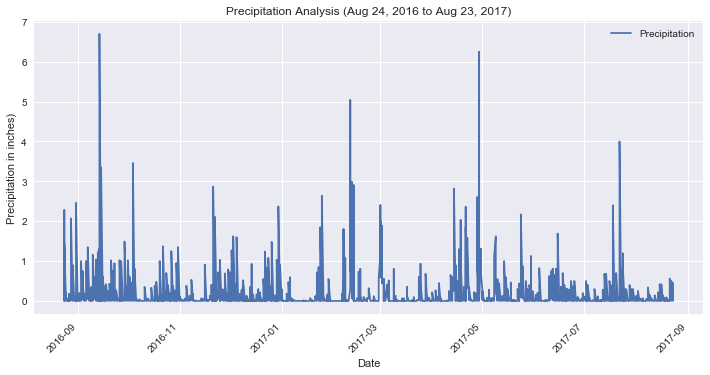

In [10]:
# Use Plot from matplotlib
precipitation_df.plot('Date', 'Prcp',figsize=(12,6))
plt.xlabel("Date")
plt.ylabel("Precipitation in inches)")
plt.title("Precipitation Analysis (Aug 24, 2016 to Aug 23, 2017)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.show()

Use Pandas to print the summary statistics for the precipitation data.

In [11]:
# Use 'describe' function to show count, avg, deviation, etc
precipitation_df.describe()

,Prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Station Analysis


Design a query to calculate the total number of stations

In [12]:
station_count = session.query(Station.station).count()
print("There are {} stations.".format(station_count))

There are 9 stations.


Design a query to find the most active stations.


List the stations and observation counts in descending order
Which station has the highest number of observations?

In [17]:
station_obs = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
                join(Station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
print("The stations with the highest number of obserations in descending order are: ")
print()
for station, name, count in station_obs:
        print("Station:", station, "in", name, "with", count, "obserations.")

The stations with the highest number of obserations in descending order are: 

Station: USC00519281 in WAIHEE 837.5, HI US with 2772 obserations.
Station: USC00519397 in WAIKIKI 717.2, HI US with 2724 obserations.
Station: USC00513117 in KANEOHE 838.1, HI US with 2709 obserations.
Station: USC00519523 in WAIMANALO EXPERIMENTAL FARM, HI US with 2669 obserations.
Station: USC00516128 in MANOA LYON ARBO 785.2, HI US with 2612 obserations.
Station: USC00514830 in KUALOA RANCH HEADQUARTERS 886.9, HI US with 2202 obserations.
Station: USC00511918 in HONOLULU OBSERVATORY 702.2, HI US with 1979 obserations.
Station: USC00517948 in PEARL CITY, HI US with 1372 obserations.
Station: USC00518838 in UPPER WAHIAWA 874.3, HI US with 511 obserations.


Design a query to retrieve the last 12 months of temperature observation data (tobs).


Filter by the station with the highest number of observations.
Plot the results as a histogram with bins=12.

In [19]:
# Filter by highest number of obs
station_most = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
                join(Station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
print("Station {}".format(station_most[0]), "in {}".format(station_most[1]), "has the most observations, with {}".format(station_most[2]))

Station USC00519281 in WAIHEE 837.5, HI US has the most observations, with 2772


In [20]:
station_12m_obs = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
                    join(Station).\
                    group_by(Measurement.station).\
                    filter(Measurement.date > first_date).\
                    order_by(func.count(Measurement.tobs).desc()).all()

busiest_station = station_12m_obs[0][0:2]   

print("The stations with the highest number of observations in the last 12 months in descending order are:")
print()
for station, name, count in station_12m_obs:
    print("Station:",station, "in",name,"with",count, "observations.")

The stations with the highest number of observations in the last 12 months in descending order are:

Station: USC00519397 in WAIKIKI 717.2, HI US with 360 observations.
Station: USC00519281 in WAIHEE 837.5, HI US with 351 observations.
Station: USC00516128 in MANOA LYON ARBO 785.2, HI US with 348 observations.
Station: USC00513117 in KANEOHE 838.1, HI US with 342 observations.
Station: USC00519523 in WAIMANALO EXPERIMENTAL FARM, HI US with 336 observations.
Station: USC00514830 in KUALOA RANCH HEADQUARTERS 886.9, HI US with 304 observations.
Station: USC00517948 in PEARL CITY, HI US with 182 observations.


In [21]:
# Filter by busiest station for the 12 months
busy_station_obs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == busiest_station[0]).\
    filter(Measurement.date > first_date).\
    order_by(Measurement.date).all()

# Put them in a df. 
tobs_df = pd.DataFrame(busy_station_obs, columns=['Date', 'Tobs'])
tobs_df.head()

,Date,Tobs
0,2016-08-24,79
1,2016-08-25,80
2,2016-08-26,79
3,2016-08-27,77
4,2016-08-28,78


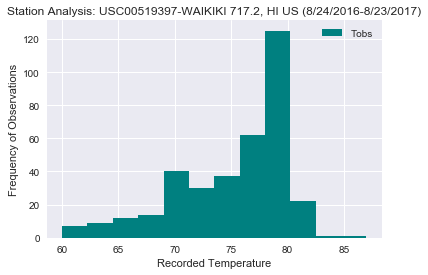

In [23]:
# Plot using a histogram with 12 bins
plt.hist(tobs_df['Tobs'],bins=12, color="teal")
plt.rcParams["figure.figsize"] = [10,6]
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency of Observations")
plt.title("Station Analysis: USC00519397-WAIKIKI 717.2, HI US (8/24/2016-8/23/2017)")
plt.legend(["Tobs"])
plt.show()

# Temperature Analysis


Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

In [24]:
def calc_temps(start_date, end_date):
    query = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
    for Tmin, Tmax, Tavg in query:
        print("From", start_date, "to", end_date, "the minimum temperature is",
              Tmin,"F, the maximum temperature is", Tmax,"F, and the average temperature is",
              "{0:.1f}".format(round(Tavg,1)),"F.")

calc_temps('2017-06-28', '2017-07-07')

From 2017-06-28 to 2017-07-07 the minimum temperature is 74 °F, the maximum temperature is 87 °F, and the average temeperature is 77.7 °F.


In [25]:
start_date = '2017-06-28'
end_date = '2017-07-07'
vacay_query = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
# Load the results into a pandas dataframe.

vacay_temps = pd.DataFrame(vacay_query, columns=['Date', 'Tobs'])
vacay_temps.head()

,Date,Tobs
0,2017-06-28,79
1,2017-06-29,79
2,2017-06-30,75
3,2017-07-01,80
4,2017-07-02,80


In [26]:
vacay_temps.describe()

,Tobs
count,60.000000
mean,77.716667
std,2.511611
min,74.000000
25%,76.000000
50%,77.000000
75%,79.250000
max,87.000000


Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

Plot the min, avg, and max temperature from your previous query as a bar chart.


Use the average temperature as the bar height.
Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

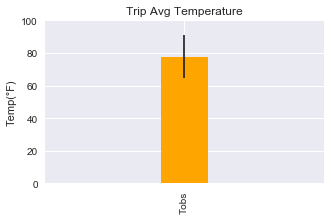

In [27]:
avg_temp = vacay_temps.mean()
temp_diff = (vacay_temps["Tobs"].max()-vacay_temps["Tobs"].min())


p = avg_temp.plot(legend=False,kind="bar",color="orange",yerr=temp_diff, width=0.1, figsize=(5,3))
p.set_title("Trip Avg Temperature")
p.set_ylabel("Temp(°F)")
p.set_ylim(0,100)
plt.show()